In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scenario0

In [3]:
names=['Id', 'period1', 'period2', 'period3', 'period4', 'periodn5', 'period6', 'period7', 'period8', 'period9']

In [36]:
speeds_df = pd.read_csv('Sodermalm Baseline/Sodermalm Baseline/output/speeds.dat', sep='\t',names=names)
densities_df = pd.read_csv('Sodermalm Baseline/Sodermalm Baseline/output/densities.dat', sep='\t',names=names)

In [37]:
# 提取Id和period的数据
id_values = speeds_df['Id']
speeds_values = speeds_df.drop('Id', axis=1)
densities_values = densities_df.drop('Id', axis=1)

In [38]:
# average the speeds/density over all time period
speeds_values_mean=speeds_values.drop('period9',axis=1).mean(axis=1)
densities_values_mean=densities_values.drop('period9',axis=1).mean(axis=1)

Text(0.5, 1.0, 'Scatter Plot of Average Speeds for all time periods')

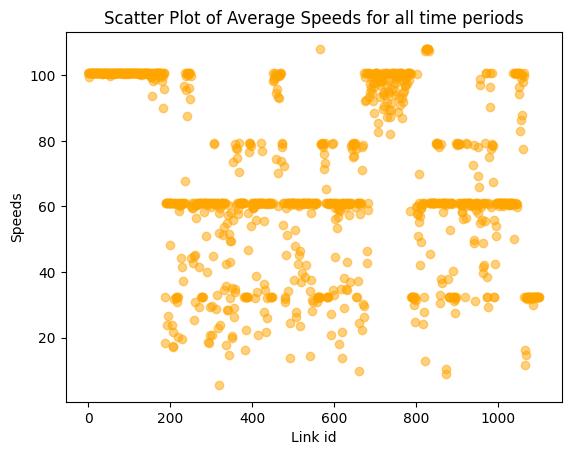

In [43]:
plt.scatter(id_values, speeds_values_mean, c='orange', marker='o', alpha=0.5, label=f'link')

# 添加标签和标题
plt.xlabel('Link id')
plt.ylabel('Speeds')
plt.title('Scatter Plot of Average Speeds for all time periods')

Text(0.5, 1.0, 'Scatter Plot of Average Densities over all time periods')

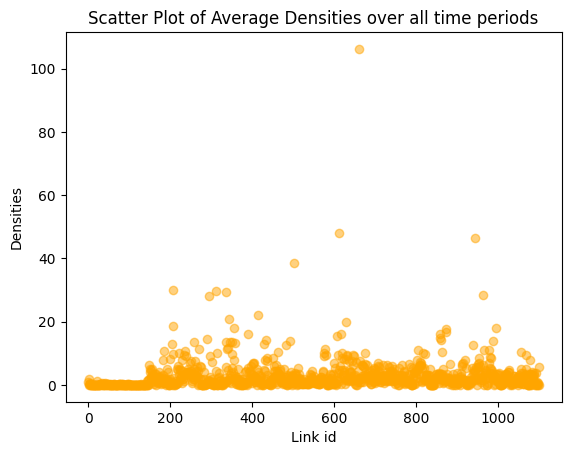

In [44]:
plt.scatter(id_values, densities_values_mean, c='orange', marker='o', alpha=0.5, label=f'link')

# 添加标签和标题
plt.xlabel('Link id')
plt.ylabel('Densities')
plt.title('Scatter Plot of Average Densities over all time periods')

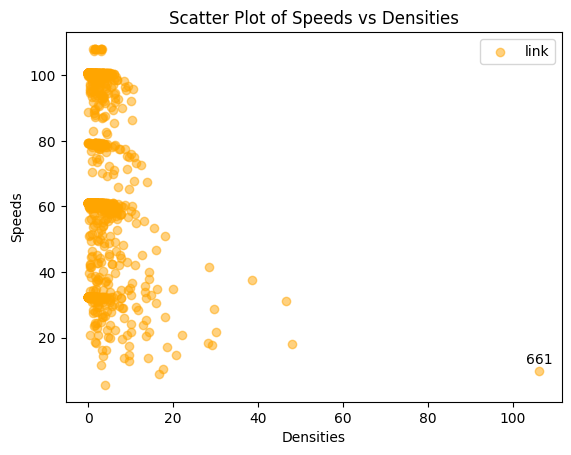

In [45]:
# 生成随机颜色
colors = np.random.rand(len(speeds_df.columns) - 1, 3)

plt.scatter(densities_values_mean, speeds_values_mean, c='orange', marker='o', alpha=0.5, label=f'link')

# 添加标签和标题
plt.xlabel('Densities')
plt.ylabel('Speeds')
plt.title('Scatter Plot of Speeds vs Densities')

# 显示每个点的Id标签（只显示横轴大于80的点）
for i, txt in enumerate(id_values):
    if densities_values_mean[i] > 80:
        plt.annotate(txt, (densities_values_mean[i], speeds_values_mean[i]), textcoords="offset points", xytext=(0, 5), ha='center')

# 显示图表
plt.legend()
plt.show()

# Scenario1

Select the SDUE option, Max Iterations = 15, Max Relative Gap = 0.10.
Does the simulation converge in 15 iterations according to both RGAP criteria? Which converges quicker, link times or route flows? 

In [2]:
convergence_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/convergence.dat', sep='\t')

In [3]:
convergence_df

,Iteration,RGAP_Linktimes,RGAP_Routeflows
0,1,2.763660,1.000000
1,2,1.281080,0.117117
2,3,0.540848,0.068185
3,4,0.456624,0.053227
4,5,0.283724,0.048266
5,6,0.186112,0.053660
6,7,0.273373,0.044986
7,8,0.266632,0.044366
8,9,0.201409,0.049100
9,10,0.166997,0.048404


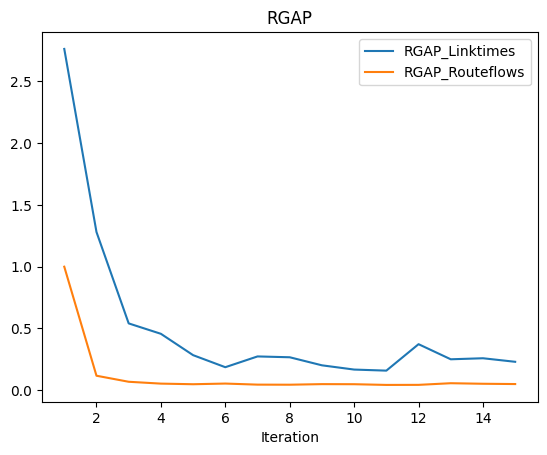

In [6]:
plt.plot(convergence_df['Iteration'],convergence_df['RGAP_Linktimes'],label='RGAP_Linktimes')
plt.plot(convergence_df['Iteration'],convergence_df['RGAP_Routeflows'],label='RGAP_Routeflows')

# 添加标签和标题
plt.xlabel('Iteration')
# plt.ylabel('Speeds')
plt.title('RGAP')

# 显示图表
plt.legend()
plt.show()

Increase the Max Relative Gap to 0.12 and Run another 15 iteration and save the results  
  
Open the density.dat, speeds.dat and flows.dat and select the 20 most congested links (based on density). Make three scatter plots: speed/density, flow/density and speed/flow based on the values for these links. What seems to be the critical density / capacity breakdown point? Hint: Group the links by free flow speed, then only make these plots for the links around Essingeleden, with the same free-flow speed.

In [48]:
speeds_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/output/speeds.dat', sep='\t')
densities_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/output/densities.dat', sep='\t')
outflows_df = pd.read_csv('Sodermalm Scenario 1 - higher demand/Sodermalm Scenario 1 - higher demand/output/outflows.dat', sep='\t')

In [49]:
# 查看列数
num_columns_speeds = speeds_df.shape[1]
num_columns_densities = densities_df.shape[1]
num_columns_outflows = outflows_df.shape[1]

print(f"Columns in speeds_df: {num_columns_speeds}")
print(f"Columns in densities_df: {num_columns_densities}")
print(f"Columns in outflows_df: {num_columns_outflows}")

Columns in speeds_df: 10
Columns in densities_df: 10
Columns in outflows_df: 10


In [50]:
# 如果你知道列的数量，可以直接使用 range
speeds_df.columns = range(num_columns_speeds)
densities_df.columns = range(num_columns_densities)
outflows_df.columns = range(num_columns_outflows)

In [51]:
densities_df

,0,1,2,3,4,5,6,7,8,9
0,1,2.541050,2.636000,2.771670,2.910930,2.870010,2.910990,2.119980,0.000000,NaN
1,2,0.144796,0.180995,0.179937,0.285834,0.269021,0.254994,0.204535,0.021822,NaN
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,4,0.000000,0.000000,0.000000,0.074074,0.146199,0.098039,0.227920,0.000000,NaN
4,5,0.519395,0.732861,0.850168,0.766885,0.893997,0.754561,0.796495,0.397554,NaN
...,...,...,...,...,...,...,...,...,...,...
1095,1096,0.000000,0.000000,0.000000,0.565667,0.516478,0.555287,0.598086,0.130276,NaN
1096,1097,0.298507,1.075950,1.075950,0.441176,0.945946,2.180850,2.227720,0.378788,NaN
1097,1098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1098,1099,5.827460,7.426470,8.442410,11.177100,10.180300,12.402200,9.482320,2.463770,NaN


In [52]:
# Assuming num_columns_speeds, num_columns_densities, num_columns_outflows are the total number of columns
# Selecting columns from the first to the eighth and calculating the mean
speeds_df['mean_speed'] = speeds_df.iloc[:, 1:num_columns_speeds].mean(axis=1)
densities_df['mean_density'] = densities_df.iloc[:, 1:num_columns_densities].mean(axis=1)
outflows_df['mean_outflow'] = outflows_df.iloc[:, 1:num_columns_outflows].mean(axis=1)

In [53]:
densities_df

,0,1,2,3,4,5,6,7,8,9,mean_density
0,1,2.541050,2.636000,2.771670,2.910930,2.870010,2.910990,2.119980,0.000000,NaN,2.345079
1,2,0.144796,0.180995,0.179937,0.285834,0.269021,0.254994,0.204535,0.021822,NaN,0.192742
2,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
3,4,0.000000,0.000000,0.000000,0.074074,0.146199,0.098039,0.227920,0.000000,NaN,0.068279
4,5,0.519395,0.732861,0.850168,0.766885,0.893997,0.754561,0.796495,0.397554,NaN,0.713990
...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,0.000000,0.000000,0.000000,0.565667,0.516478,0.555287,0.598086,0.130276,NaN,0.295724
1096,1097,0.298507,1.075950,1.075950,0.441176,0.945946,2.180850,2.227720,0.378788,NaN,1.078111
1097,1098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
1098,1099,5.827460,7.426470,8.442410,11.177100,10.180300,12.402200,9.482320,2.463770,NaN,8.425254


sort the densiites value based on the mean density ascendly, and keep the 20 highest density links.

In [54]:
# Identify the 20 most congested links based on density (using the last interation)
congested_links_densities = densities_df.sort_values('mean_density', ascending=False).head(20)

congested_link_ids = congested_links_densities.index
# Extract corresponding values from speeds dataset
congested_links_speeds = speeds_df.iloc[congested_link_ids]
# Extract corresponding values from outflows dataset
congested_links_outflows = outflows_df.iloc[congested_link_ids]

In [55]:
congested_links_speeds

,0,1,2,3,4,5,6,7,8,9,mean_speed
235,236,34.2133,4.76400,4.39748,4.40397,4.40020,4.40713,4.39516,4.41514,NaN,8.174547
630,631,31.3351,8.56151,2.57811,2.01259,2.28673,2.11046,2.07521,10.34070,NaN,7.662551
660,661,13.4275,9.19914,11.06700,8.64096,8.16730,9.25599,8.67313,8.68082,NaN,9.638980
1056,1057,99.9040,32.82990,10.21050,8.88150,8.88728,8.39369,9.27748,8.90128,NaN,23.410704
610,611,40.0767,7.57143,5.24142,3.68605,3.36385,3.64073,3.75939,3.41589,NaN,8.844432
943,944,60.8349,57.97630,17.22880,6.44567,5.83117,5.28135,4.86360,7.67793,NaN,20.767465
1055,1056,96.3408,97.66670,62.67460,7.09911,6.59474,6.61417,6.35611,7.34858,NaN,36.336851
232,233,82.4742,92.81410,89.28750,40.91250,10.67360,10.37180,9.49250,11.41140,NaN,43.429700
942,943,32.4937,22.03420,19.36320,20.01000,23.49660,24.61000,30.53230,27.35800,NaN,24.987250
629,630,57.9806,58.49010,58.46530,55.87080,7.52082,3.51135,3.66314,15.91440,NaN,32.677064


Then we manually select the links that are around Essingeleden based on the network information in Messo.  
They are 233,236,237,239,1055, 1056, 1057 

In [56]:
links_around_Essingeleden=[233,236,237,239,1055,1056,1057]

In [61]:
# link ID column is at position 0 in the DataFrame
congested_links_densities_around_Essingeleden = congested_links_densities[congested_links_densities[0].isin(links_around_Essingeleden)].sort_values(0)
congested_links_speeds_around_Essingeleden = congested_links_speeds[congested_links_speeds[0].isin(links_around_Essingeleden)].sort_values(0)
congested_links_outflows_around_Essingeleden = congested_links_outflows[congested_links_outflows[0].isin(links_around_Essingeleden)].sort_values(0)

In [62]:
congested_links_densities_around_Essingeleden

,0,1,2,3,4,5,6,7,8,9,mean_density
232,233,17.42920,12.49350,14.59290,52.7021,106.5720,116.7190,110.4950,98.0046,NaN,66.126037
235,236,52.02350,141.02700,141.82500,141.8690,141.6820,141.8740,141.9780,141.1540,NaN,130.429062
236,237,4.52156,4.32096,5.41075,14.5105,45.1199,74.3533,98.2257,74.9992,NaN,40.182734
238,239,14.43050,12.14540,15.61570,15.0830,42.5940,84.5579,122.0900,97.1856,NaN,50.462763
1054,1055,30.23550,35.88600,30.19720,83.2846,69.2552,46.5184,44.9303,44.4917,NaN,48.099863
1055,1056,7.16290,6.33195,34.01430,123.0050,122.7750,127.6850,122.7760,119.2100,NaN,82.870019
1056,1057,5.08080,40.38800,117.40500,132.3870,132.3900,133.1370,133.7200,135.6710,NaN,103.772350


In [71]:
def plot_scatter(x_df, y_df, label='', title='', xlabel='', ylabel=''):
    # Scatter plot for speed/density
    plt.scatter(x_df.iloc[:,10], y_df.iloc[:,10], alpha=0.5)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display different colors for each point based on the first column
    for i in range(len(x_df)):
        plt.text(x_df.iloc[i, 10], y_df.iloc[i, 10], str(x_df.iloc[i, 0]))

    plt.show()

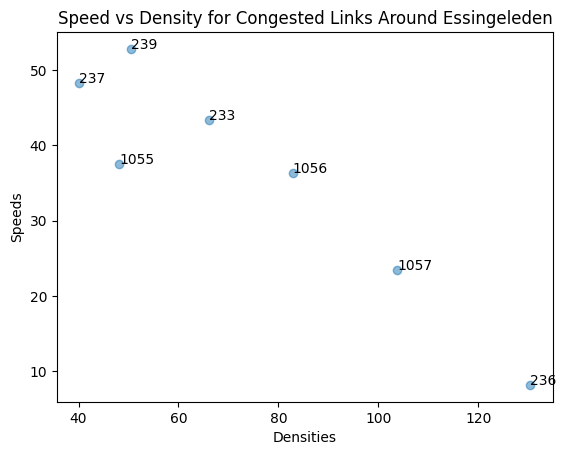

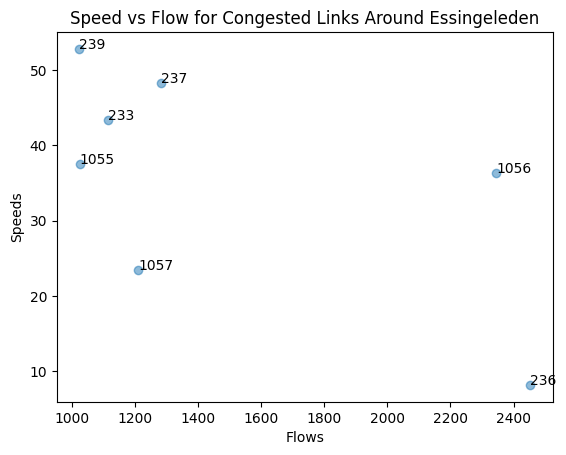

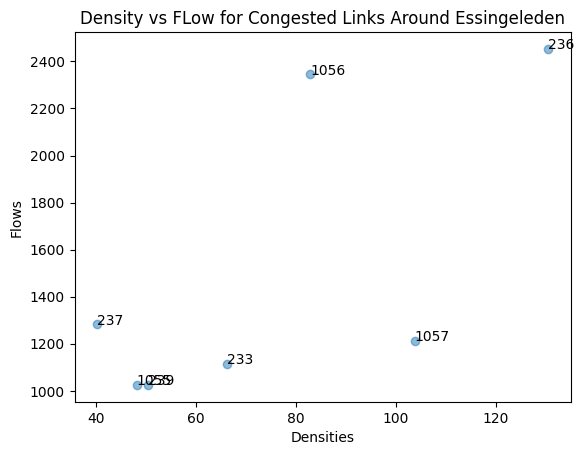

In [73]:
# Example usage
plot_scatter(congested_links_densities_around_Essingeleden, congested_links_speeds_around_Essingeleden, title='Speed vs Density for Congested Links Around Essingeleden', xlabel='Densities', ylabel='Speeds')
plot_scatter(congested_links_outflows_around_Essingeleden, congested_links_speeds_around_Essingeleden, title='Speed vs Flow for Congested Links Around Essingeleden', xlabel='Flows', ylabel='Speeds')
plot_scatter(congested_links_densities_around_Essingeleden, congested_links_outflows_around_Essingeleden, title='Density vs FLow for Congested Links Around Essingeleden', xlabel='Densities', ylabel='Flows')

# Scenario 2